In [1]:
# import dependencies.
import pandas as pd
import plotly.express as px
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR as svr
from sklearn.metrics import (
    r2_score,
    mean_absolute_error as mae,
    mean_squared_error as mse,
)
import pickle

In [2]:
df = pd.read_csv('tips.csv')

In [3]:
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [4]:
print(df.tail())

     total_bill   tip     sex smoker   day   time  size
429       16.00  2.00    Male    Yes  Thur  Lunch     2
430       13.16  2.75  Female     No  Thur  Lunch     2
431       17.47  3.50  Female     No  Thur  Lunch     2
432       34.30  6.70    Male     No  Thur  Lunch     6
433       41.19  5.00    Male     No  Thur  Lunch     5


In [5]:
df.shape

(434, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  434 non-null    float64
 1   tip         434 non-null    float64
 2   sex         434 non-null    object 
 3   smoker      434 non-null    object 
 4   day         434 non-null    object 
 5   time        434 non-null    object 
 6   size        434 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 23.9+ KB


In [7]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
df.describe()

total_bill         tip        size
count  434.000000  434.000000  434.000000
mean    20.066429    3.061636    2.516129
std      9.132889    1.475769    0.917355
min      3.070000    1.000000    1.000000
25%     13.270000    2.000000    2.000000
50%     17.905000    3.000000    2.000000
75%     25.157500    3.607500    3.000000
max     50.810000   10.000000    6.000000

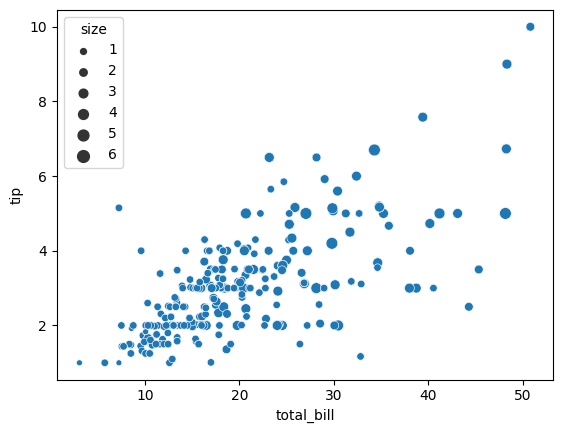

In [9]:
scatter = sns.scatterplot(x="total_bill",y="tip",data = df,size="size")

In [10]:
sex_scatter = px.scatter(data_frame = df, x = "total_bill", y = "tip", size = "size", color = "sex")
sex_scatter.show()

In [11]:
sex_pie = px.pie(df, values = "tip", names = "sex", hole = 0.6)
sex_pie.show()

In [12]:
test = px.scatter(data_frame = df, x = "total_bill", y = "tip", size = "size", color = "smoker")
test.show()

In [13]:
pie = px.pie(df, values = "tip", names = "smoker", hole = 0.6)
pie

In [14]:
test = px.scatter(data_frame = df, x = "total_bill", y = "tip", size = "size", color = "day")
test.show()

In [15]:
pie = px.pie(df, values = "tip", names = "day", hole = 0.6)
pie

In [16]:
test = px.scatter(data_frame = df, x = "total_bill", y = "tip", size = "size", color = "time")
test.show()

In [17]:
pie = px.pie(df, values = "tip", names = "time", hole = 0.6)
pie

# Feature Engineering

In [18]:
le = LabelEncoder()
# handling sex feature.
print(df.sex.unique())
df["sex"] = le.fit_transform(df["sex"])

['Female' 'Male']


In [19]:
# handling somking feature.
print(df.smoker.unique())
df["smoker"] = le.fit_transform(df["smoker"])

['No' 'Yes']


In [20]:
# handling day feature.
print(df.day.unique())
days = pd.get_dummies(df.day, drop_first = True)
df = pd.concat([df,days],axis=1)
df.drop(["day"],axis = 1, inplace = True)

['Sun' 'Sat' 'Thur' 'Fri']


In [21]:
# handling time feature.
print(df.time.unique())
df["time"] = le.fit_transform(df["time"])

['Dinner' 'Lunch']


In [22]:
df.head()

total_bill   tip  sex  smoker  time  size    Sat   Sun   Thur
0       16.99  1.01    0       0     0     2  False  True  False
1       10.34  1.66    1       0     0     3  False  True  False
2       21.01  3.50    1       0     0     3  False  True  False
3       23.68  3.31    1       0     0     2  False  True  False
4       24.59  3.61    0       0     0     4  False  True  False

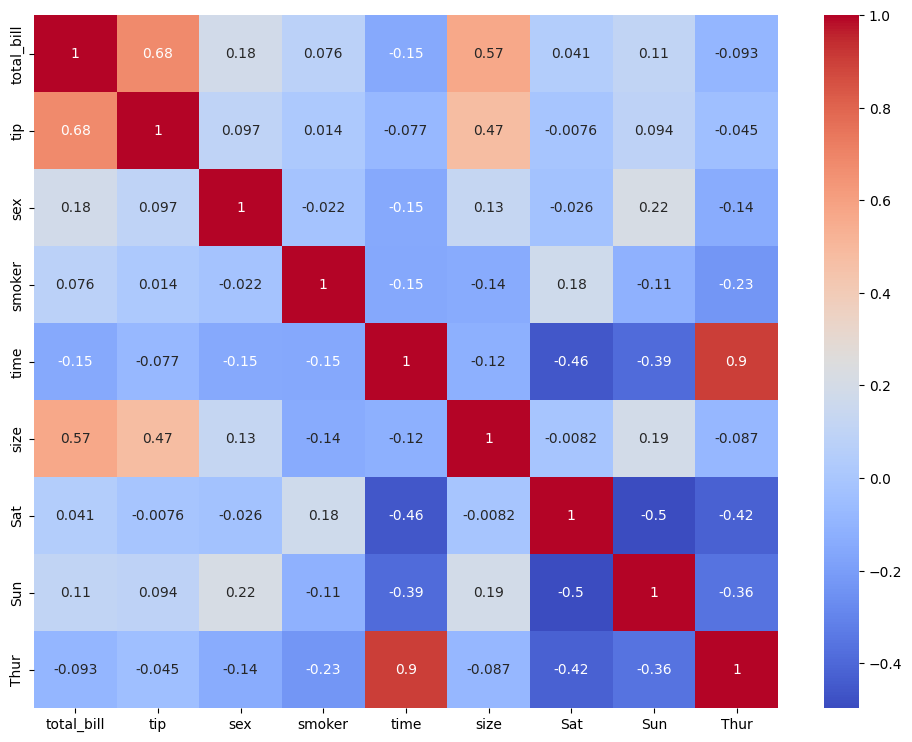

In [23]:
# Correlation
cor_relation = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(cor_relation,annot = True,cmap="coolwarm")
plt.show()

In [24]:
X = df.drop(['tip'], axis = 1)
Y = df["tip"]
xData = X.values
yData = Y.values
print(X.shape)
print(Y.shape)

(434, 8)
(434,)


# storing models

In [25]:
# We will create a dictionary for each different models. 
# Each dictionary will have keys for model, its prediction value,
# r2-score, mean squre error, root mean square error, and mean absolute error.
lr_dict = {
    "model":[],
    "prediction":[],
    "r2_score":[],
    "mse":[],
    "rmse":[],
    "mae":[]
}
rfr_dict = {
    "model":[],
    "prediction":[],
    "r2_score":[],
    "mse":[],
    "rmse":[],
    "mae":[]
}
svm_dict = {
    "model":[],
    "prediction":[],
    "r2_score":[],
    "mse":[],
    "rmse":[],
    "mae":[]
}
knn_dict = {
    "model":[],
    "prediction":[],
    "r2_score":[],
    "mse":[],
    "rmse":[],
    "mae":[]
}
stack_dict = {
    "model":[],
    "prediction":[],
    "r2_score":[],
    "mse":[],
    "rmse":[],
    "mae":[]
}

In [26]:
# we have to store our testing set of each variation to compare with predictions of the models.
# so we will create a list to store this.
yTest_list = []

In [27]:
#Train and test data on different variation
# varition 1 : 80-20 split
# varition 2 : 75-25 split
# varition 3 : 70-30 split

for i in range(3):
    # spliting data into training and testing columns.
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.20 + (i*0.05),random_state = 31)
    # storing yTest in the list (yTest_list).
    yTest_list.append(yTest)
    
    # making use of Linear regression model. 
    lr = LinearRegression()                                      
    lr.fit(xTrain, yTrain)
    lr_dict["prediction"].append(lr.predict(xTest))
    lr_dict["model"].append(lr)
    # storing r2-score,mse,rmse and mae.
    lr_dict["r2_score"].append(r2_score(yTest,lr_dict["prediction"][i]))
    lr_dict["mse"].append(mse(yTest,lr_dict["prediction"][i]))
    lr_dict["mae"].append(mae(yTest,lr_dict["prediction"][i]))
    # since, rmse is simply the square root of mse. so, we will just find square root
    # of mse using math function.
    lr_dict["rmse"].append(math.sqrt(mse(yTest_list[i],lr_dict["prediction"][i])))
    
    # making use of Random Forest regressor model. 
    rfr = RandomForestRegressor()                    
    rfr.fit(xTrain, yTrain)
    rfr_dict["prediction"].append(rfr.predict(xTest))
    rfr_dict["model"].append(rfr)
    # storing r2-score,mse,rmse and mae.
    rfr_dict["r2_score"].append(r2_score(yTest,rfr_dict["prediction"][i]))
    rfr_dict["mse"].append(mse(yTest,rfr_dict["prediction"][i]))
    rfr_dict["mae"].append(mae(yTest,rfr_dict["prediction"][i]))
    # since, rmse is simply the square root of mse. so, we will just find square root
    # of mse using math function.
    rfr_dict["rmse"].append(math.sqrt(mse(yTest,rfr_dict["prediction"][i])))
    
    
    # making use of SVM model. 
    svm = svr(kernel="linear",C=1,gamma="auto")                    
    svm.fit(xTrain, yTrain)
    svm_dict["prediction"].append(svm.predict(xTest))
    svm_dict["model"].append(svm)
    # storing r2-score,mse,rmse and mae.
    svm_dict["r2_score"].append(r2_score(yTest,svm_dict["prediction"][i]))
    svm_dict["mse"].append(mse(yTest,svm_dict["prediction"][i]))
    svm_dict["mae"].append(mae(yTest,svm_dict["prediction"][i]))
    # since, rmse is simply the square root of mse. so, we will just find square root
    # of mse using math function.
    svm_dict["rmse"].append(math.sqrt(mse(yTest,svm_dict["prediction"][i])))
    
    # making use of K-Nearest Neighbour(KNN) model. 
    knn = KNeighborsRegressor(n_neighbors=3)                    
    knn.fit(xTrain, yTrain)
    knn_dict["prediction"].append(knn.predict(xTest))
    knn_dict["model"].append(knn)
    # storing r2-score,mse,rmse and mae.
    knn_dict["r2_score"].append(r2_score(yTest,knn_dict["prediction"][i]))
    knn_dict["mse"].append(mse(yTest,knn_dict["prediction"][i]))
    knn_dict["mae"].append(mae(yTest,knn_dict["prediction"][i]))
    # since, rmse is simply the square root of mse. so, we will just find square root
    # of mse using math function.
    knn_dict["rmse"].append(math.sqrt(mse(yTest,knn_dict["prediction"][i])))
    

A stacking model

In [28]:
base_models = [
    ('rf', RandomForestRegressor()),
    ('gb', GradientBoostingRegressor())
]

meta_model = LinearRegression()

# Create the stacking regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

for i in range(3):
    # spliting data into training and testing columns.
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.20 + (i*0.05),random_state = 31)

    # making use of Stacking model. 
    stacking_model.fit(xTrain, yTrain)
    stack_dict["prediction"].append(stacking_model.predict(xTest))
    stack_dict["model"].append(stacking_model)
    # storing r2-score,mse,rmse and mae.
    stack_dict["r2_score"].append(r2_score(yTest,stack_dict["prediction"][i]))
    stack_dict["mse"].append(mse(yTest,stack_dict["prediction"][i]))
    stack_dict["mae"].append(mae(yTest,stack_dict["prediction"][i]))
    # since, rmse is simply the square root of mse. so, we will just find square root
    # of mse using math function.
    stack_dict["rmse"].append(math.sqrt(mse(yTest,stack_dict["prediction"][i])))

# Evaluation

In [29]:
# printing Evaluation report of Linear regression (r2-score, mean_square_error,
# root_mean_sqare_error and mean_absolute_error.)
for i in range(3):
    print(f"\nTrain Test split at {80-(i*5)}-{20+(i*5)}")
    print("r2 score of Linear regression model              :",lr_dict["r2_score"][i])
    print("mean square error of Linear regression model     :",lr_dict["mse"][i])
    print("Root mean square error of Linear regression model:",lr_dict["rmse"][i])
    print("mean absolute error of Linear regression model   :",lr_dict["mae"][i])


Train Test split at 80-20
r2 score of Linear regression model              : 0.4876761949501752
mean square error of Linear regression model     : 1.3275615473369886
Root mean square error of Linear regression model: 1.15219857113997
mean absolute error of Linear regression model   : 0.8051900010738701

Train Test split at 75-25
r2 score of Linear regression model              : 0.4791884649778383
mean square error of Linear regression model     : 1.261659241118019
Root mean square error of Linear regression model: 1.1232360576112304
mean absolute error of Linear regression model   : 0.7899047320740296

Train Test split at 70-30
r2 score of Linear regression model              : 0.481926514987397
mean square error of Linear regression model     : 1.1626302053060065
Root mean square error of Linear regression model: 1.0782533122165712
mean absolute error of Linear regression model   : 0.7572458989767376


In [30]:
# printing Evaluation report of Random Forest Regressor (r2-score, mean_square_error,
# root_mean_sqare_error and mean_absolute_error.)
for i in range(3):
    print(f"\nTrain Test split at {80-(i*5)}-{20+(i*5)}")
    print("r2 score of Random Forest model              :",rfr_dict["r2_score"][i])
    print("mean square error of Random Forest model     :",rfr_dict["mse"][i])
    print("Root mean square error of Random Forest model:",rfr_dict["rmse"][i])
    print("mean absolute error of Random Forest model   :",rfr_dict["mae"][i])


Train Test split at 80-20
r2 score of Random Forest model              : 0.920638352028898
mean square error of Random Forest model     : 0.20564625563218422
Root mean square error of Random Forest model: 0.4534823652934965
mean absolute error of Random Forest model   : 0.3182551724137935

Train Test split at 75-25
r2 score of Random Forest model              : 0.8811575864024455
mean square error of Random Forest model     : 0.2878942175229359
Root mean square error of Random Forest model: 0.5365577485443072
mean absolute error of Random Forest model   : 0.35591284403669726

Train Test split at 70-30
r2 score of Random Forest model              : 0.8850166106668194
mean square error of Random Forest model     : 0.2580389952671757
Root mean square error of Random Forest model: 0.5079753884463063
mean absolute error of Random Forest model   : 0.34633740458015255


In [31]:
# printing Evaluation report of SVM (r2-score, mean_square_error,
# root_mean_sqare_error and mean_absolute_error.)
for i in range(3):
    print(f"\nTrain Test split at {80-(i*5)}-{20+(i*5)}")
    print("r2 score of SVM model              :",svm_dict["r2_score"][i])
    print("mean square error of SVM model     :",svm_dict["mse"][i])
    print("Root mean square error of SVM model:",svm_dict["rmse"][i])
    print("mean absolute error of SVM model   :",svm_dict["mae"][i])


Train Test split at 80-20
r2 score of SVM model              : 0.4748289607443996
mean square error of SVM model     : 1.3608520053502784
Root mean square error of SVM model: 1.1665556160553505
mean absolute error of SVM model   : 0.8063947371968888

Train Test split at 75-25
r2 score of SVM model              : 0.46261920634161546
mean square error of SVM model     : 1.3017980569297225
Root mean square error of SVM model: 1.1409636527645053
mean absolute error of SVM model   : 0.7868806209696599

Train Test split at 70-30
r2 score of SVM model              : 0.46981154679543646
mean square error of SVM model     : 1.1898179081392295
Root mean square error of SVM model: 1.0907877466029903
mean absolute error of SVM model   : 0.7581554984958091


In [32]:
# printing Evaluation report of K-Nearest Neighbour(KNN) (r2-score, mean_square_error,
# root_mean_sqare_error and mean_absolute_error.)
for i in range(3):
    print(f"\nTrain Test split at {80-(i*5)}-{20+(i*5)}")
    print("r2 score of KNN model              :",knn_dict["r2_score"][i])
    print("mean square error of KNN model     :",knn_dict["mse"][i])
    print("Root mean square error of KNN model:",knn_dict["rmse"][i])
    print("mean absolute error of KNN model   :",knn_dict["mae"][i])


Train Test split at 80-20
r2 score of KNN model              : 0.7414542791775829
mean square error of KNN model     : 0.6699578544061303
Root mean square error of KNN model: 0.8185095322634491
mean absolute error of KNN model   : 0.6199233716475094

Train Test split at 75-25
r2 score of KNN model              : 0.6833551839677601
mean square error of KNN model     : 0.7670679918450559
Root mean square error of KNN model: 0.875824178614096
mean absolute error of KNN model   : 0.6525688073394496

Train Test split at 70-30
r2 score of KNN model              : 0.6933741517152743
mean square error of KNN model     : 0.6881117896522476
Root mean square error of KNN model: 0.8295250385927164
mean absolute error of KNN model   : 0.6195928753180662


In [33]:
# printing Evaluation report of Stacking model (r2-score, mean_square_error,
# root_mean_sqare_error and mean_absolute_error.)
for i in range(3):
    print(f"\nTrain Test split at {80-(i*5)}-{20+(i*5)}")
    print("r2 score of stack model              :",stack_dict["r2_score"][i])
    print("mean square error of stack model     :",stack_dict["mse"][i])
    print("Root mean square error of stack model:",stack_dict["rmse"][i])
    print("mean absolute error of stack model   :",stack_dict["mae"][i])


Train Test split at 80-20
r2 score of stack model              : 0.9090832470758109
mean square error of stack model     : 0.23558847744573
Root mean square error of stack model: 0.4853745743708976
mean absolute error of stack model   : 0.3343074517635355

Train Test split at 75-25
r2 score of stack model              : 0.8812804321720178
mean square error of stack model     : 0.2875966252270845
Root mean square error of stack model: 0.5362803606576363
mean absolute error of stack model   : 0.3485724193200728

Train Test split at 70-30
r2 score of stack model              : 0.8728685776160745
mean square error of stack model     : 0.28530090032203104
Root mean square error of stack model: 0.5341356572276663
mean absolute error of stack model   : 0.3808444463681522


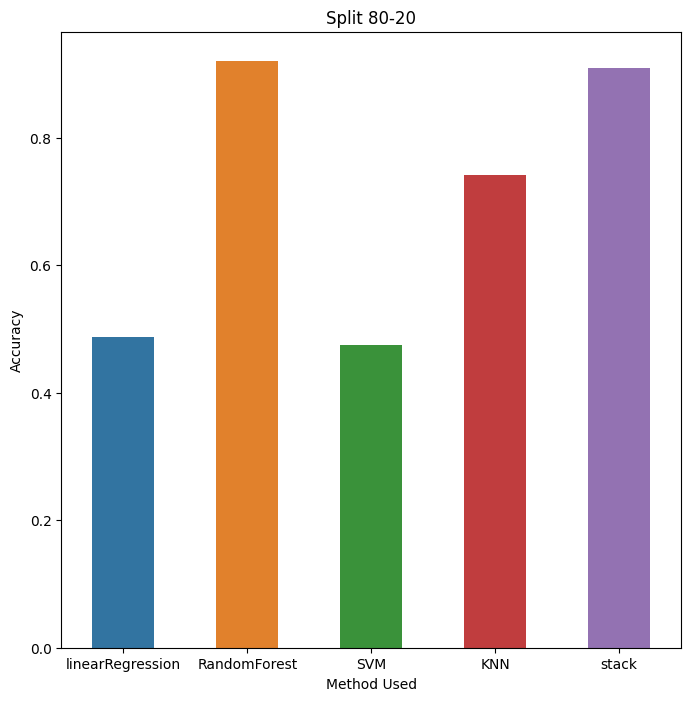

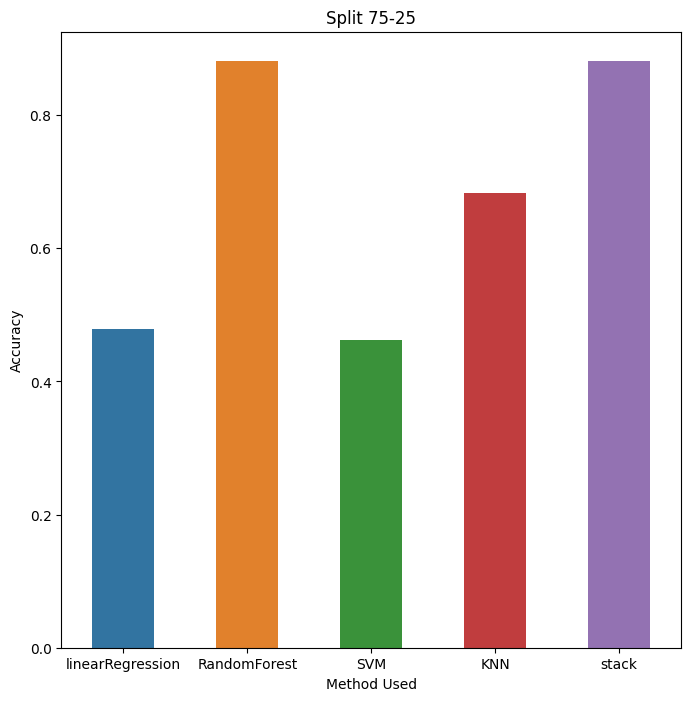

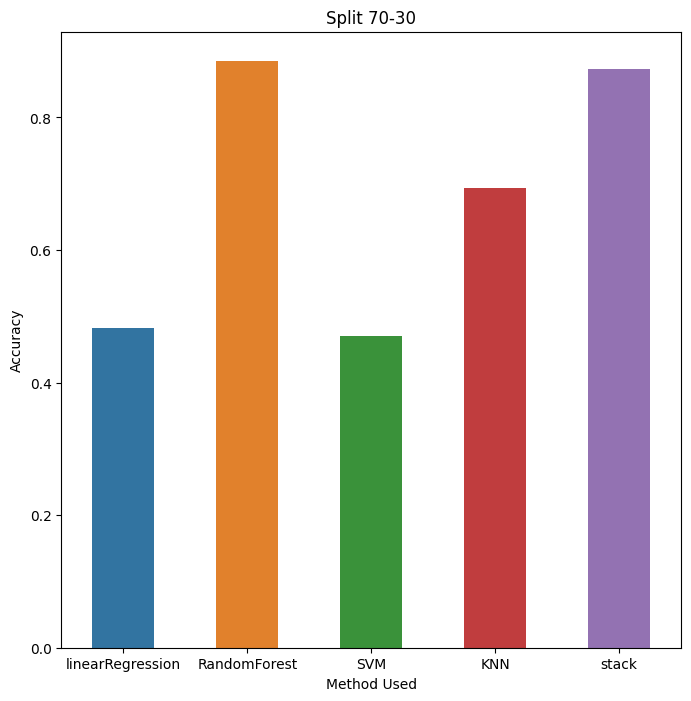

In [34]:
#comparing all variatins of different models through bar plot
for i in range(3):
    plt.figure(figsize=(8,8))
    list1=['linearRegression','RandomForest','SVM','KNN','stack']
    list2=[lr_dict["r2_score"][i],rfr_dict["r2_score"][i],
           svm_dict["r2_score"][i],knn_dict["r2_score"][i],stack_dict["r2_score"][i]]
    df_Accuracy=pd.DataFrame({"Method Used":list1,"Accuracy":list2})
    chart=sns.barplot(x='Method Used',y='Accuracy',data=df_Accuracy,width = 0.5)
    # title vary depending on variation.
    plt.title(f"Split {80-(i*5)}-{20+(i*5)}")
    plt.show()

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2006468986.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




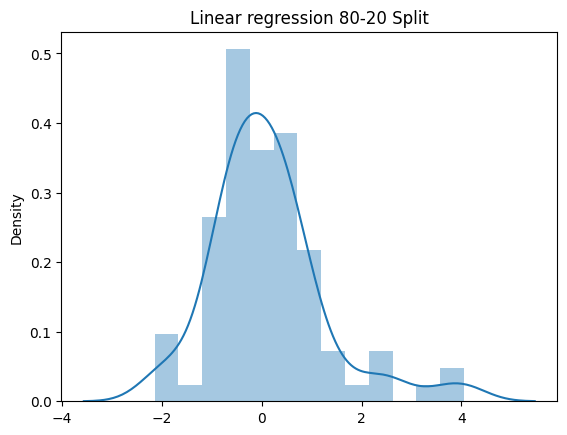

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2006468986.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




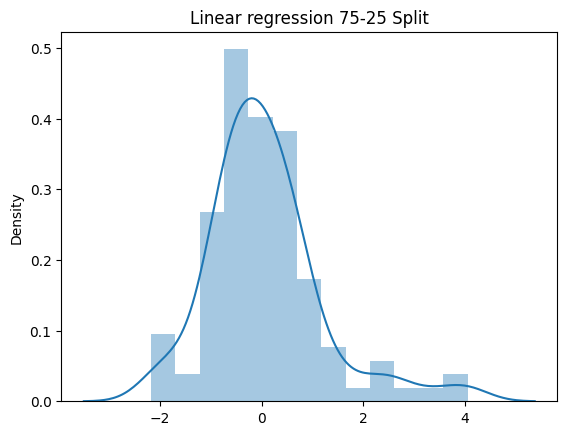

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2006468986.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




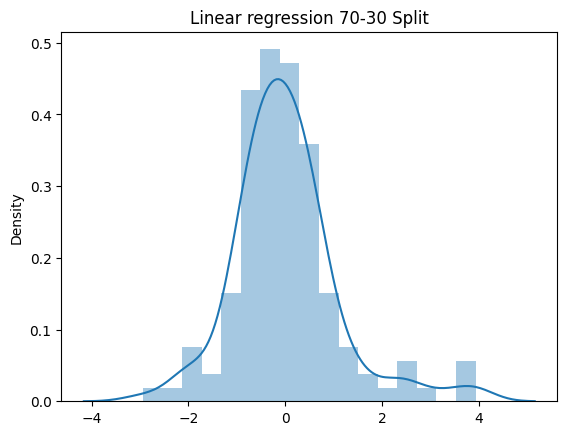

In [35]:
for i in range(3):
    plt.title(f"Linear regression {80-(i*5)}-{20+(i*5)} Split")
    sns.distplot(yTest_list[i] - lr_dict["prediction"][i])
    plt.show()

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\217157219.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




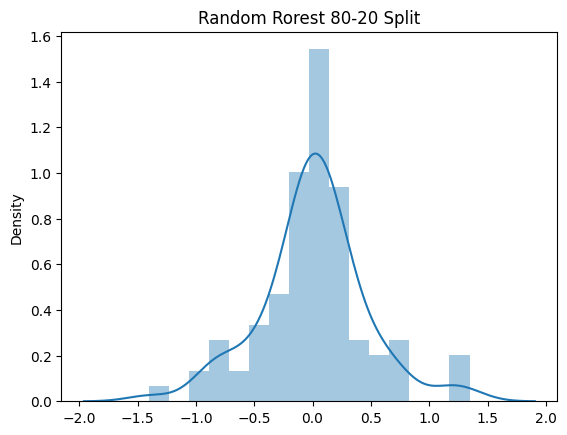

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\217157219.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




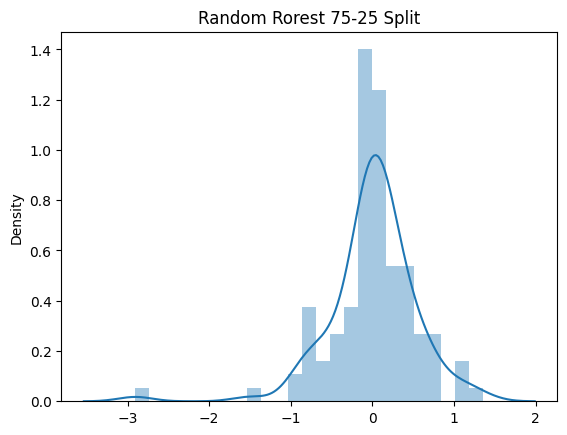

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\217157219.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




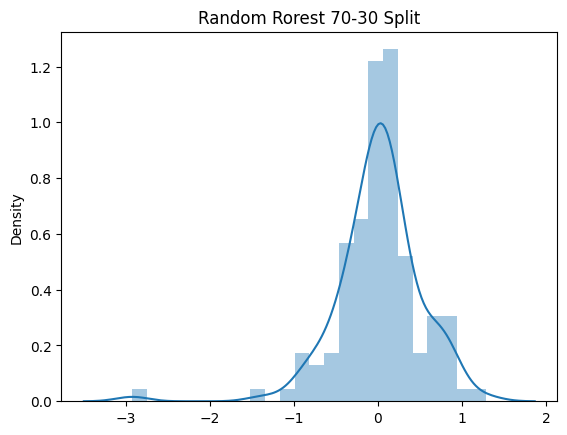

In [36]:
for i in range(3):
    plt.title(f"Random Rorest {80-(i*5)}-{20+(i*5)} Split")
    sns.distplot(yTest_list[i] - rfr_dict["prediction"][i])
    plt.show()

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2735330934.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




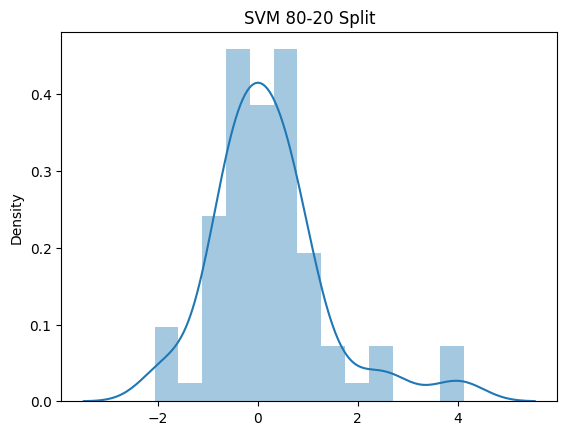

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2735330934.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




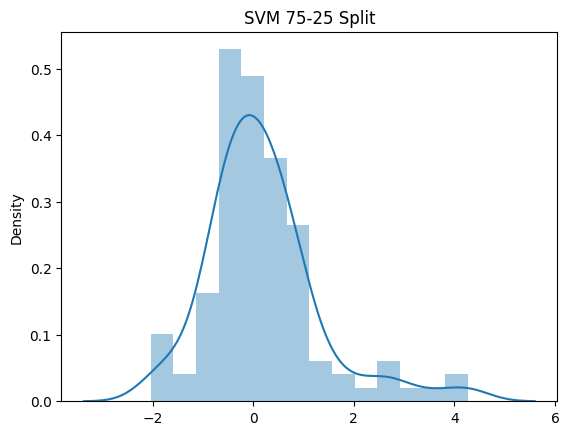

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2735330934.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




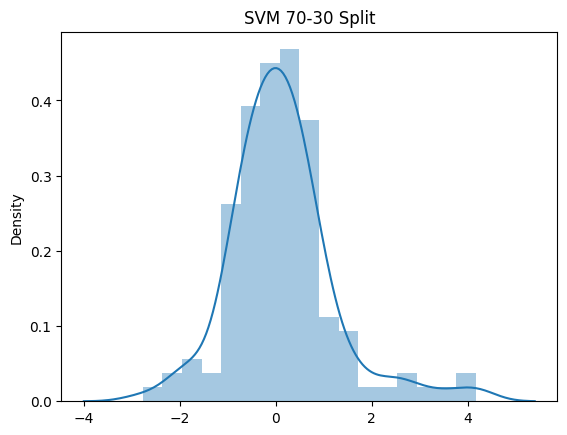

In [37]:
for i in range(3):
    plt.title(f"SVM {80-(i*5)}-{20+(i*5)} Split")
    sns.distplot(yTest_list[i] - svm_dict["prediction"][i])
    plt.show()

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\3228638151.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




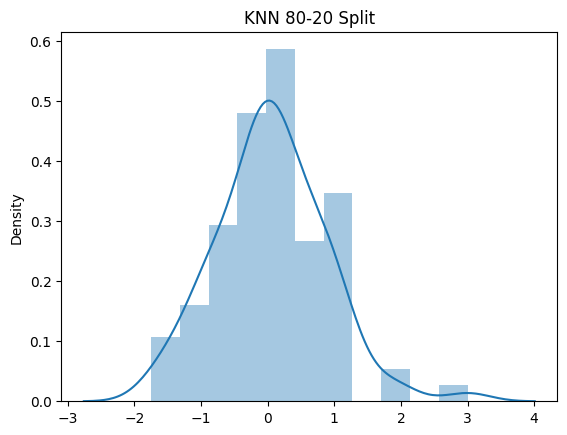

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\3228638151.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




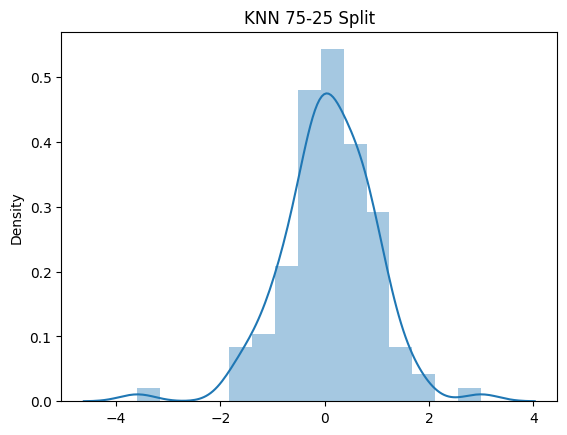

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\3228638151.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




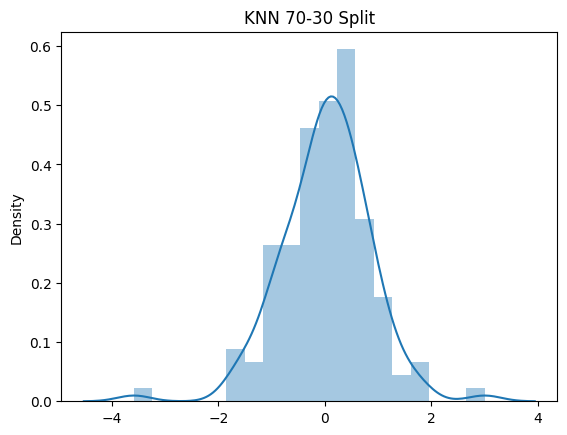

In [38]:
for i in range(3):
    plt.title(f"KNN {80-(i*5)}-{20+(i*5)} Split")
    sns.distplot(yTest_list[i] - knn_dict["prediction"][i])
    plt.show()

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\577557730.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




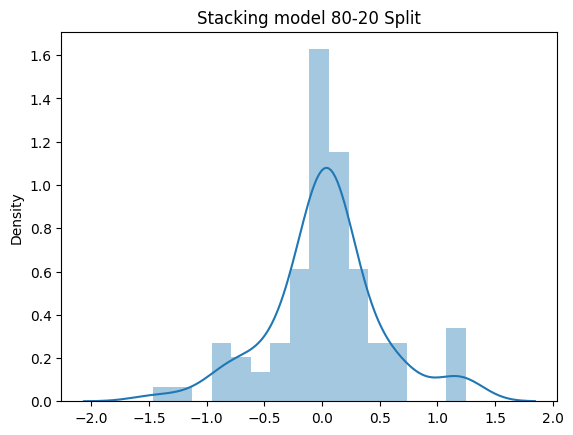

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\577557730.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




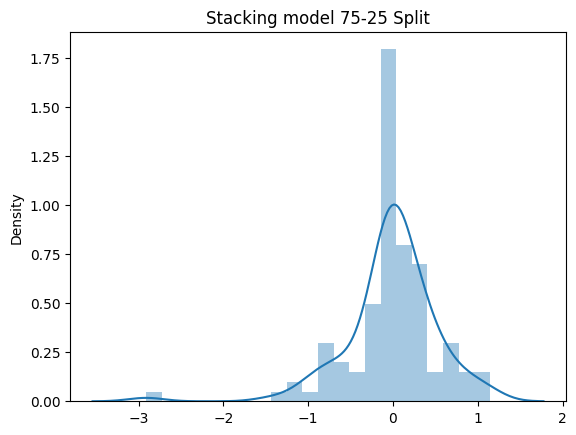

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\577557730.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




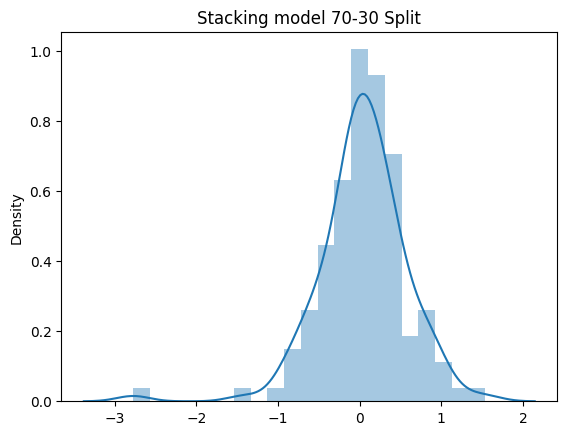

In [39]:
for i in range(3):
    plt.title(f"Stacking model {80-(i*5)}-{20+(i*5)} Split")
    sns.distplot(yTest_list[i] - stack_dict["prediction"][i])
    plt.show()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
     total_bill   tip     sex smoker   day   time  size
429       16.00  2.00    Male    Yes  Thur  Lunch     2
430       13.16  2.75  Female     No  Thur  Lunch     2
431       17.47  3.50  Female     No  Thur  Lunch     2
432       34.30  6.70    Male     No  Thur  Lunch     6
433       41.19  5.00    Male     No  Thur  Lunch     5
(434, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  434 non-null    float64
 1   tip         434 non-null    float64
 2   sex         434 non-null    object 
 3   smoker      434 n

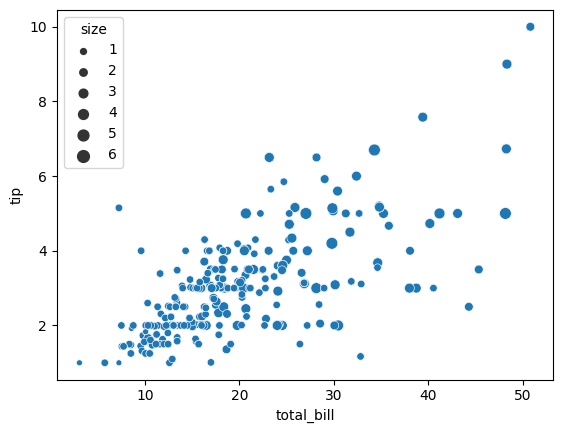

['Female' 'Male']
['No' 'Yes']
['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Lunch']


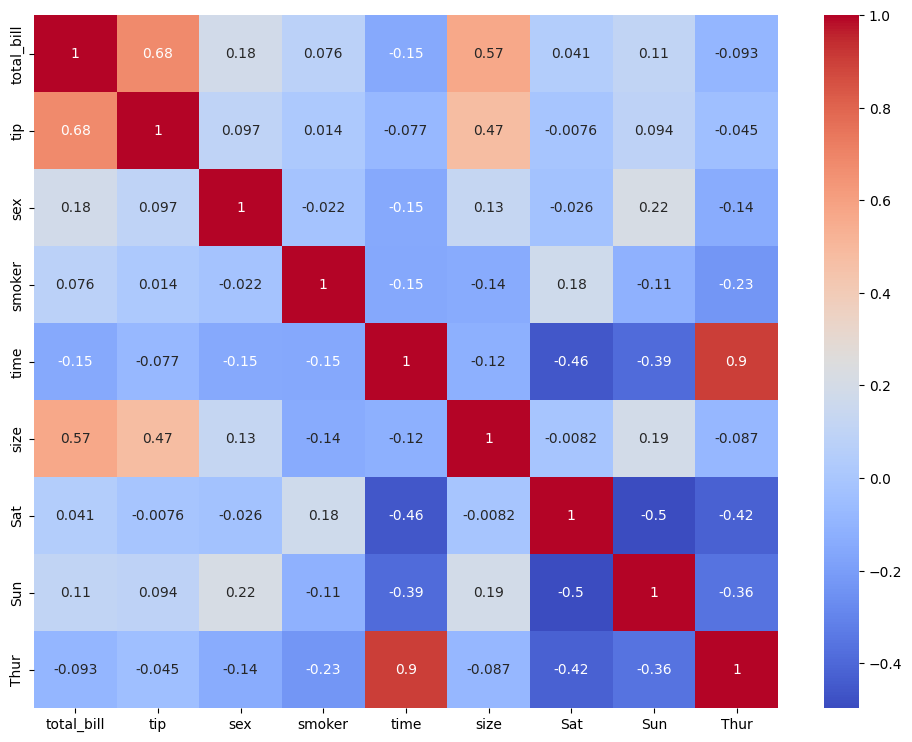

(434, 8)
(434,)

Train Test split at 80-20
r2 score of Linear regression model              : 0.4876761949501752
mean square error of Linear regression model     : 1.3275615473369886
Root mean square error of Linear regression model: 1.15219857113997
mean absolute error of Linear regression model   : 0.8051900010738701

Train Test split at 75-25
r2 score of Linear regression model              : 0.4791884649778383
mean square error of Linear regression model     : 1.261659241118019
Root mean square error of Linear regression model: 1.1232360576112304
mean absolute error of Linear regression model   : 0.7899047320740296

Train Test split at 70-30
r2 score of Linear regression model              : 0.481926514987397
mean square error of Linear regression model     : 1.1626302053060065
Root mean square error of Linear regression model: 1.0782533122165712
mean absolute error of Linear regression model   : 0.7572458989767376

Train Test split at 80-20
r2 score of Random Forest model         

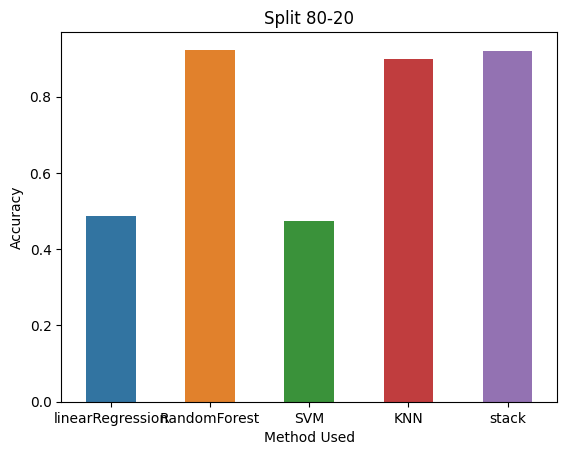

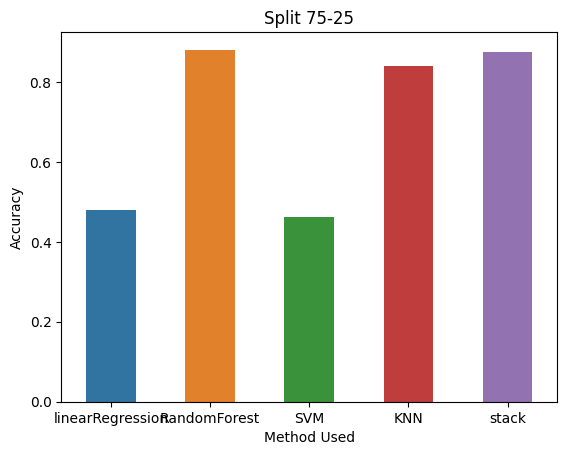

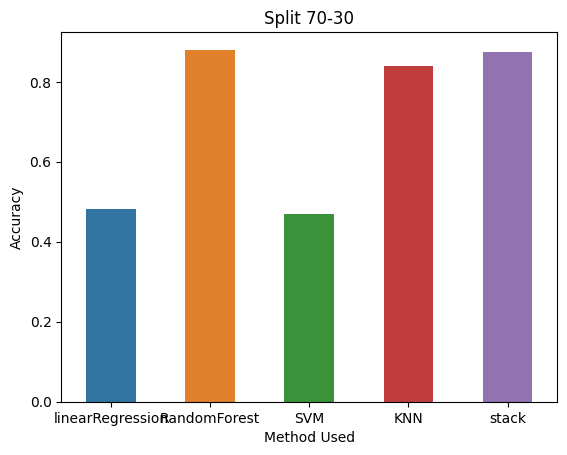

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2213402548.py:273: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




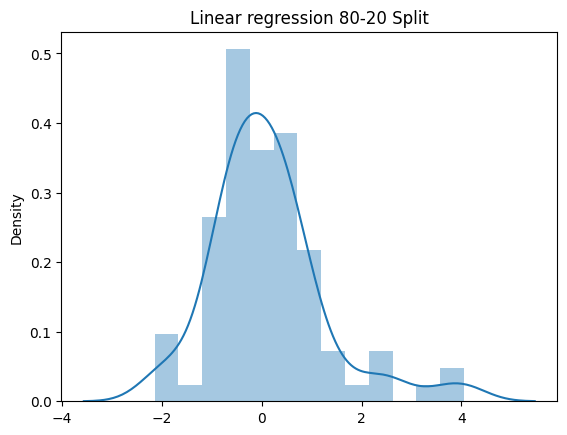

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2213402548.py:273: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




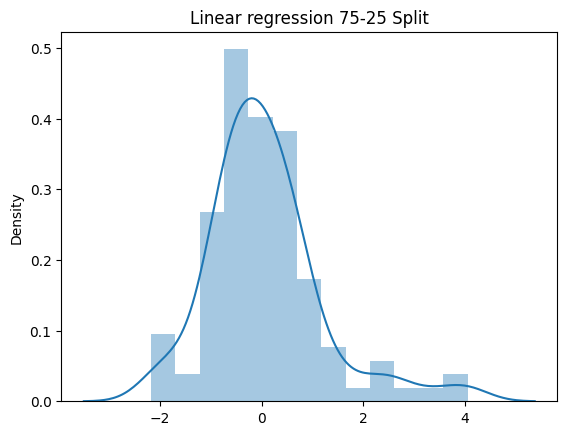

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2213402548.py:273: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




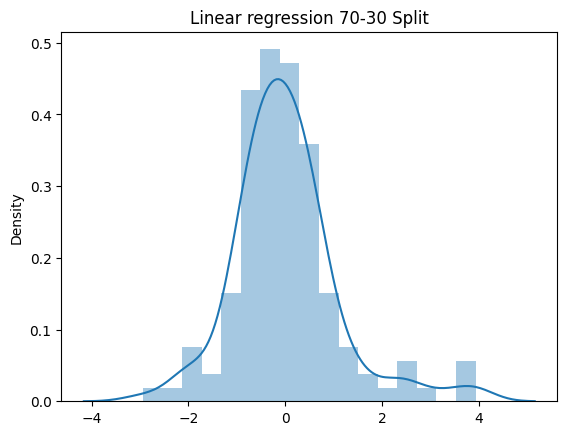

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2213402548.py:278: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




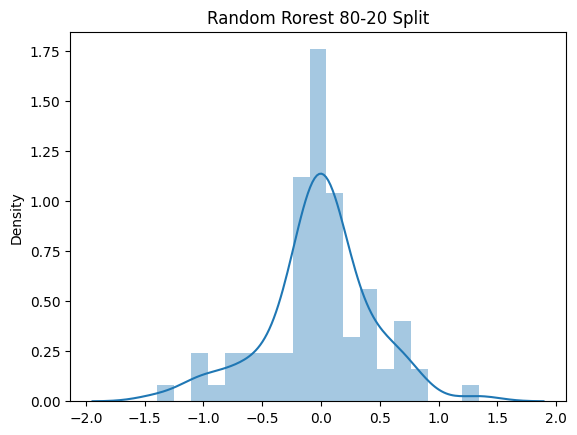

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2213402548.py:278: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




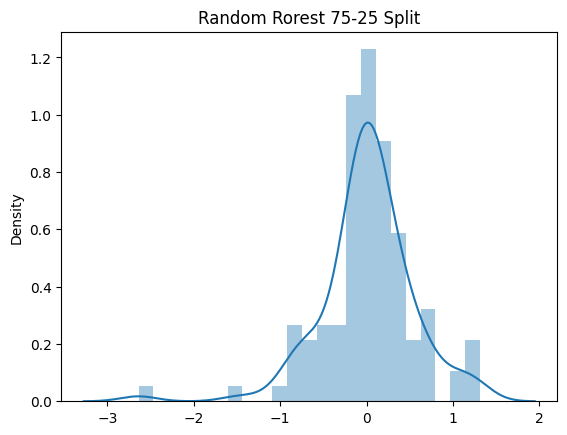

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2213402548.py:278: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




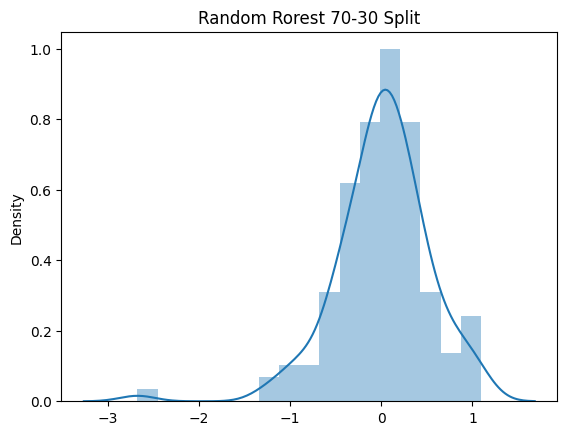

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2213402548.py:283: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




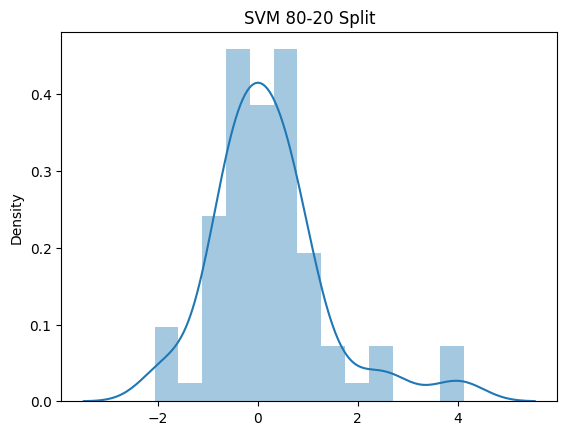

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2213402548.py:283: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




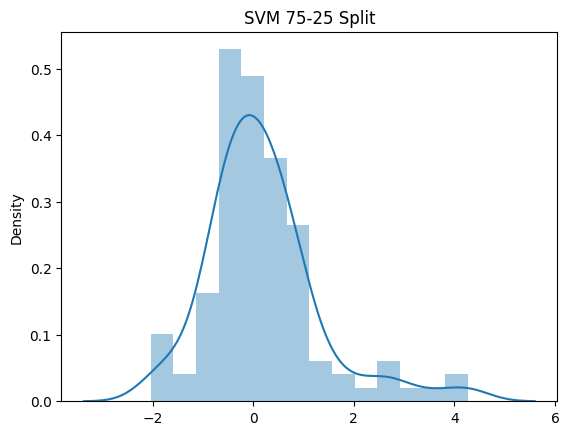

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2213402548.py:283: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




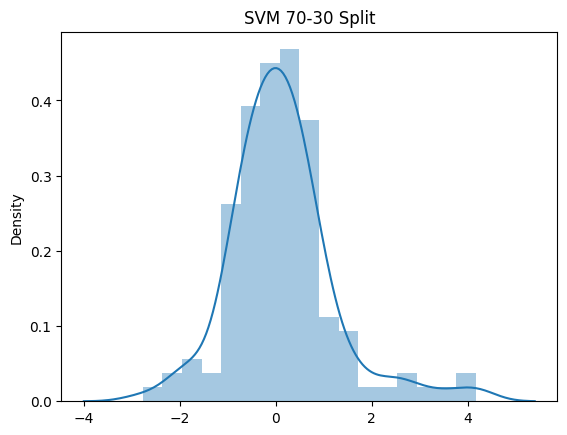

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2213402548.py:288: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




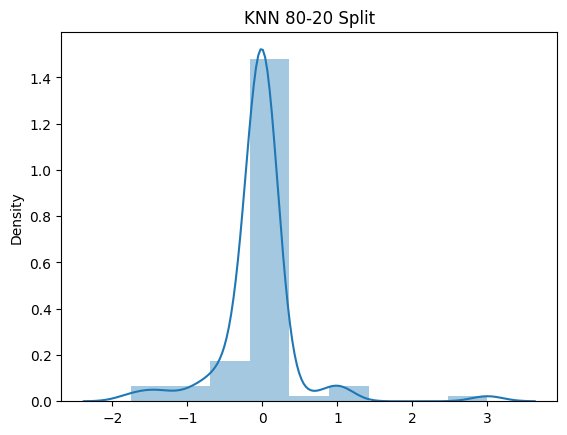

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2213402548.py:288: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




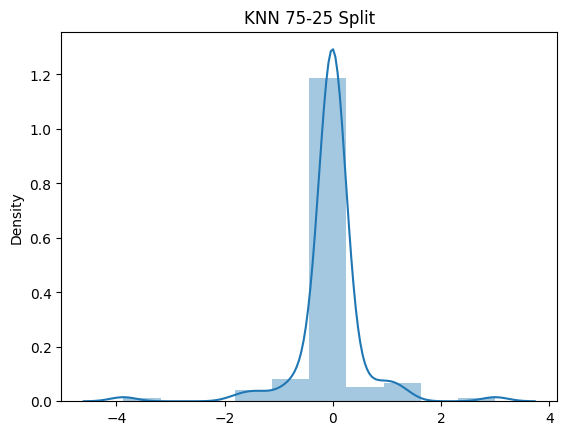

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2213402548.py:288: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




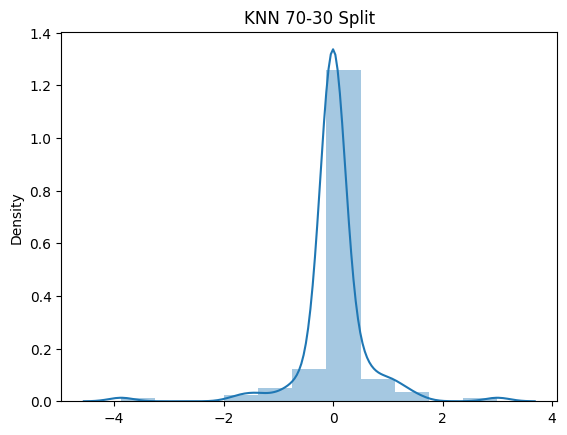

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2213402548.py:293: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




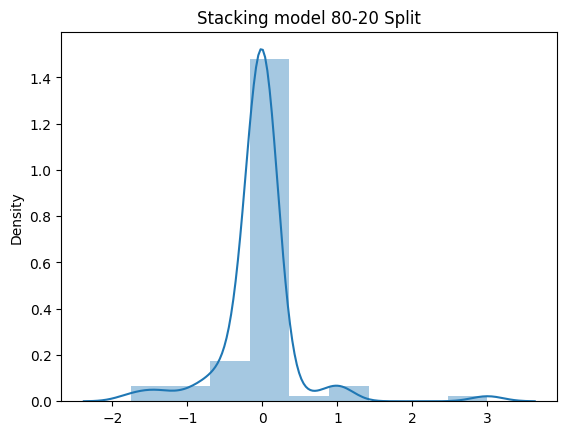

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2213402548.py:293: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




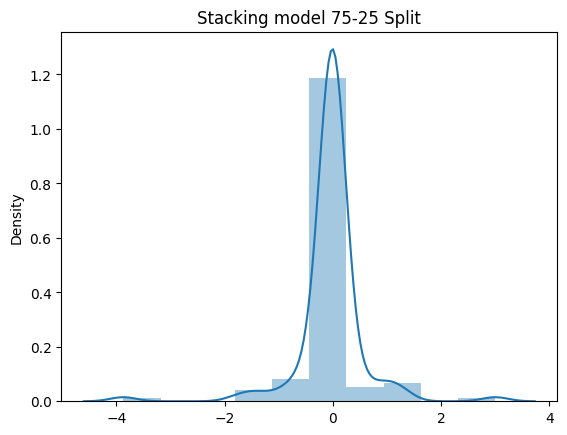

C:\Users\Talha khan\AppData\Local\Temp\ipykernel_3476\2213402548.py:293: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




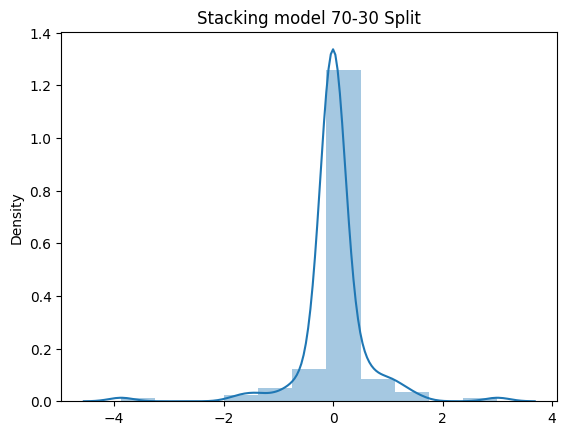

In [40]:
# import dependencies.
import pandas as pd
import plotly.express as px
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR as svr
from sklearn.metrics import (
    r2_score,
    mean_absolute_error as mae,
    mean_squared_error as mse,
)
import pickle
# load the dataset
df = pd.read_csv('tips.csv')

# EDA(exploratory data analysis).
print(df.head())
print(df.tail())
print(df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

scatter = sns.scatterplot(x="total_bill",y="tip",data = df,size="size")
plt.show()
# showing the four continous attribute through scatter plot and donut chart.
sex_scatter = px.scatter(data_frame = df, x = "total_bill", y = "tip", size = "size", color = "sex")
sex_pie = px.pie(df, values = "tip", names = "sex", hole = 0.6)
sex_scatter.show()
sex_pie.show()

smoker_scatter = px.scatter(data_frame = df, x = "total_bill", y = "tip", size = "size", color = "smoker")
smoker_pie = px.pie(df, values = "tip", names = "smoker", hole = 0.6)
smoker_scatter.show()
smoker_pie.show()

day_scatter = px.scatter(data_frame = df, x = "total_bill", y = "tip", size = "size", color = "day")
day_pie = px.pie(df, values = "tip", names = "day", hole = 0.6)
day_scatter.show()
day_pie.show()

time_scatter = px.scatter(data_frame = df, x = "total_bill", y = "tip", size = "size", color = "time")
time_pie = px.pie(df, values = "tip", names = "time", hole = 0.6)
time_scatter.show()
time_pie.show()

# feature engineering
le = LabelEncoder()
# handling sex feature.
print(df.sex.unique())
df["sex"] = le.fit_transform(df["sex"])
# handling somking feature.
print(df.smoker.unique())
df["smoker"] = le.fit_transform(df["smoker"])
# handling day feature.
print(df.day.unique())
days = pd.get_dummies(df.day, drop_first = True)
df = pd.concat([df,days],axis=1)
df.drop(["day"],axis = 1, inplace = True)
# handling time feature.
print(df.time.unique())
df["time"] = le.fit_transform(df["time"])

# Correlation
cor_relation = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(cor_relation,annot = True,cmap="coolwarm")
plt.show()
# Creating dependent and Independent variables.
X = df.drop(['tip'], axis = 1)
Y = df["tip"]
xData = X.values
yData = Y.values
print(X.shape)
print(Y.shape)

# We will create a dictionary for each different models. 
# Each dictionary will have keys for model, its prediction value,
# r2-score, mean squre error, root mean square error, and mean absolute error.
lr_dict = {
    "model":[],
    "prediction":[],
    "r2_score":[],
    "mse":[],
    "rmse":[],
    "mae":[]
}
rfr_dict = {
    "model":[],
    "prediction":[],
    "r2_score":[],
    "mse":[],
    "rmse":[],
    "mae":[]
}
svm_dict = {
    "model":[],
    "prediction":[],
    "r2_score":[],
    "mse":[],
    "rmse":[],
    "mae":[]
}
knn_dict = {
    "model":[],
    "prediction":[],
    "r2_score":[],
    "mse":[],
    "rmse":[],
    "mae":[]
}
stack_dict = {
    "model":[],
    "prediction":[],
    "r2_score":[],
    "mse":[],
    "rmse":[],
    "mae":[]
}
# we have to store our testing set of each variation to compare with predictions of the models.
# so we will create a list to store this.
yTest_list = []

#Train and test data on different variation
# varition 1 : 80-20 split
# varition 2 : 75-25 split
# varition 3 : 70-30 split
for i in range(3):
    # spliting data into training and testing columns.
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.20 + (i*0.05),random_state = 31)
    # storing yTest in the list (yTest_list).
    yTest_list.append(yTest)  

    # making use of Linear regression model. 
    lr = LinearRegression()                                      
    lr.fit(xTrain, yTrain)
    lr_dict["prediction"].append(lr.predict(xTest))
    lr_dict["model"].append(lr)
    # storing r2-score,mse,rmse and mae.
    lr_dict["r2_score"].append(r2_score(yTest,lr_dict["prediction"][i]))
    lr_dict["mse"].append(mse(yTest,lr_dict["prediction"][i]))
    lr_dict["mae"].append(mae(yTest,lr_dict["prediction"][i]))
    # since, rmse is simply the square root of mse. so, we will just find square root
    # of mse using math function.
    lr_dict["rmse"].append(math.sqrt(mse(yTest_list[i],lr_dict["prediction"][i])))
    
    # making use of Random Forest regressor model. 
    rfr = RandomForestRegressor()                    
    rfr.fit(xTrain, yTrain)
    rfr_dict["prediction"].append(rfr.predict(xTest))
    rfr_dict["model"].append(rfr)
    # storing r2-score,mse,rmse and mae.
    rfr_dict["r2_score"].append(r2_score(yTest,rfr_dict["prediction"][i]))
    rfr_dict["mse"].append(mse(yTest,rfr_dict["prediction"][i]))
    rfr_dict["mae"].append(mae(yTest,rfr_dict["prediction"][i]))
    # since, rmse is simply the square root of mse. so, we will just find square root
    # of mse using math function.
    rfr_dict["rmse"].append(math.sqrt(mse(yTest,rfr_dict["prediction"][i])))
       
    # making use of SVM model. 
    svm = svr(kernel="linear",C=1,gamma="auto")                    
    svm.fit(xTrain, yTrain)
    svm_dict["prediction"].append(svm.predict(xTest))
    svm_dict["model"].append(svm)
    # storing r2-score,mse,rmse and mae.
    svm_dict["r2_score"].append(r2_score(yTest,svm_dict["prediction"][i]))
    svm_dict["mse"].append(mse(yTest,svm_dict["prediction"][i]))
    svm_dict["mae"].append(mae(yTest,svm_dict["prediction"][i]))
    # since, rmse is simply the square root of mse. so, we will just find square root
    # of mse using math function.
    svm_dict["rmse"].append(math.sqrt(mse(yTest,svm_dict["prediction"][i])))
    
    # making use of K-Nearest Neighbour(KNN) model. 
    knn = KNeighborsRegressor(n_neighbors=1)                    
    knn.fit(xTrain, yTrain)
    knn_dict["prediction"].append(knn.predict(xTest))
    knn_dict["model"].append(knn)
    # storing r2-score,mse,rmse and mae.
    knn_dict["r2_score"].append(r2_score(yTest,knn_dict["prediction"][i]))
    knn_dict["mse"].append(mse(yTest,knn_dict["prediction"][i]))
    knn_dict["mae"].append(mae(yTest,knn_dict["prediction"][i]))
    # since, rmse is simply the square root of mse. so, we will just find square root
    # of mse using math function.
    knn_dict["rmse"].append(math.sqrt(mse(yTest,knn_dict["prediction"][i])))
    
#Creating Base model for stacking 
base_models = [
    ('rf', RandomForestRegressor()),
    ('gb', GradientBoostingRegressor())
]
# Creating meta model for stacking
meta_model = LinearRegression()
# Create the stacking regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
for i in range(3):
    # spliting data into training and testing columns.
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.20 + (i*0.05),random_state = 31)

    # making use of Stacking model. 
    stacking_model.fit(xTrain, yTrain)
    stack_dict["prediction"].append(stacking_model.predict(xTest))
    stack_dict["model"].append(stacking_model)
    # storing r2-score,mse,rmse and mae.
    stack_dict["r2_score"].append(r2_score(yTest,stack_dict["prediction"][i]))
    stack_dict["mse"].append(mse(yTest,stack_dict["prediction"][i]))
    stack_dict["mae"].append(mae(yTest,stack_dict["prediction"][i]))
    # since, rmse is simply the square root of mse. so, we will just find square root
    # of mse using math function.
    stack_dict["rmse"].append(math.sqrt(mse(yTest,stack_dict["prediction"][i])))
    
# Evaluation of the models.

# printing Evaluation report of Linear regression (r2-score, mean_square_error,
# root_mean_sqare_error and mean_absolute_error.)
for i in range(3):
    print(f"\nTrain Test split at {80-(i*5)}-{20+(i*5)}")
    print("r2 score of Linear regression model              :",lr_dict["r2_score"][i])
    print("mean square error of Linear regression model     :",lr_dict["mse"][i])
    print("Root mean square error of Linear regression model:",lr_dict["rmse"][i])
    print("mean absolute error of Linear regression model   :",lr_dict["mae"][i])   
# printing Evaluation report of Random Forest Regressor (r2-score, mean_square_error,
# root_mean_sqare_error and mean_absolute_error.)
for i in range(3):
    print(f"\nTrain Test split at {80-(i*5)}-{20+(i*5)}")
    print("r2 score of Random Forest model              :",rfr_dict["r2_score"][i])
    print("mean square error of Random Forest model     :",rfr_dict["mse"][i])
    print("Root mean square error of Random Forest model:",rfr_dict["rmse"][i])
    print("mean absolute error of Random Forest model   :",rfr_dict["mae"][i])   
# printing Evaluation report of SVM (r2-score, mean_square_error,
# root_mean_sqare_error and mean_absolute_error.)
for i in range(3):
    print(f"\nTrain Test split at {80-(i*5)}-{20+(i*5)}")
    print("r2 score of SVM model              :",svm_dict["r2_score"][i])
    print("mean square error of SVM model     :",svm_dict["mse"][i])
    print("Root mean square error of SVM model:",svm_dict["rmse"][i])
    print("mean absolute error of SVM model   :",svm_dict["mae"][i])
# printing Evaluation report of K-Nearest Neighbour(KNN) (r2-score, mean_square_error,
# root_mean_sqare_error and mean_absolute_error.)
for i in range(3):
    print(f"\nTrain Test split at {80-(i*5)}-{20+(i*5)}")
    print("r2 score of KNN model              :",knn_dict["r2_score"][i])
    print("mean square error of KNN model     :",knn_dict["mse"][i])
    print("Root mean square error of KNN model:",knn_dict["rmse"][i])
    print("mean absolute error of KNN model   :",knn_dict["mae"][i])  
# printing Evaluation report of Stacking model (r2-score, mean_square_error,
# root_mean_sqare_error and mean_absolute_error.)
for i in range(3):
    print(f"\nTrain Test split at {80-(i*5)}-{20+(i*5)}")
    print("r2 score of stack model              :",stack_dict["r2_score"][i])
    print("mean square error of stack model     :",stack_dict["mse"][i])
    print("Root mean square error of stack model:",stack_dict["rmse"][i])
    print("mean absolute error of stack model   :",stack_dict["mae"][i])  
#comparing all variatins of different models through bar plot
for i in range(3):
    list1=['linearRegression','RandomForest','SVM','KNN','stack']
    list2=[lr_dict["r2_score"][i],rfr_dict["r2_score"][i],
           svm_dict["r2_score"][i],knn_dict["r2_score"][i],stack_dict["r2_score"][i]]
    df_Accuracy=pd.DataFrame({"Method Used":list1,"Accuracy":list2})
    chart=sns.barplot(x='Method Used',y='Accuracy',data=df_Accuracy,width = 0.5)
    # title vary depending on variation.
    plt.title(f"Split {80-(i*5)}-{20+(i*5)}")
    plt.show()    
# Showing The variance of different through distplot.
# Linear Regression
for i in range(3):
    plt.title(f"Linear regression {80-(i*5)}-{20+(i*5)} Split")
    sns.distplot(yTest_list[i] - lr_dict["prediction"][i])
    plt.show()  
# Random Forest.
for i in range(3):
    plt.title(f"Random Rorest {80-(i*5)}-{20+(i*5)} Split")
    sns.distplot(yTest_list[i] - rfr_dict["prediction"][i])
    plt.show()
# SVM.
for i in range(3):
    plt.title(f"SVM {80-(i*5)}-{20+(i*5)} Split")
    sns.distplot(yTest_list[i] - svm_dict["prediction"][i])
    plt.show()  
# KNN
for i in range(3):
    plt.title(f"KNN {80-(i*5)}-{20+(i*5)} Split")
    sns.distplot(yTest_list[i] - knn_dict["prediction"][i])
    plt.show()
# Stacking.
for i in range(3):
    plt.title(f"Stacking model {80-(i*5)}-{20+(i*5)} Split")
    sns.distplot(yTest_list[i] - knn_dict["prediction"][i])
    plt.show()

# Dumping the models in the pickle file
pickle.dump(lr_dict["model"][0], open('lr_model.pkl', 'wb'))
pickle.dump(rfr_dict["model"][0], open('rfr_model.pkl', 'wb'))
pickle.dump(svm_dict["model"][0], open('svm_model.pkl', 'wb'))
pickle.dump(knn_dict["model"][0], open('knn_model.pkl', 'wb'))
pickle.dump(stack_dict["model"][0], open('stack_model.pkl', 'wb'))
